In [1]:
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.decomposition import PCA
import matplotlib
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [2]:
X, y = datasets.load_iris(return_X_y=True, as_frame=True)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
sepal length (cm)    150 non-null float64
sepal width (cm)     150 non-null float64
petal length (cm)    150 non-null float64
petal width (cm)     150 non-null float64
dtypes: float64(4)
memory usage: 4.8 KB


In [3]:
X['sepal width (cm)']

0      3.5
1      3.0
2      3.2
3      3.1
4      3.6
5      3.9
6      3.4
7      3.4
8      2.9
9      3.1
10     3.7
11     3.4
12     3.0
13     3.0
14     4.0
15     4.4
16     3.9
17     3.5
18     3.8
19     3.8
20     3.4
21     3.7
22     3.6
23     3.3
24     3.4
25     3.0
26     3.4
27     3.5
28     3.4
29     3.2
      ... 
120    3.2
121    2.8
122    2.8
123    2.7
124    3.3
125    3.2
126    2.8
127    3.0
128    2.8
129    3.0
130    2.8
131    3.8
132    2.8
133    2.8
134    2.6
135    3.0
136    3.4
137    3.1
138    3.0
139    3.1
140    3.1
141    3.1
142    2.7
143    3.2
144    3.3
145    3.0
146    2.5
147    3.0
148    3.4
149    3.0
Name: sepal width (cm), Length: 150, dtype: float64

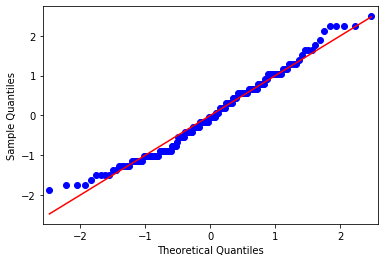

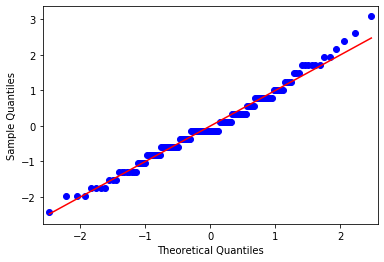

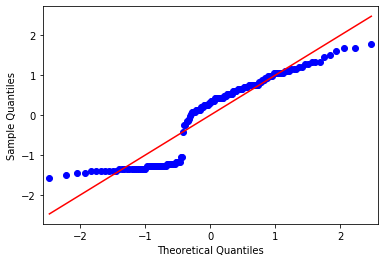

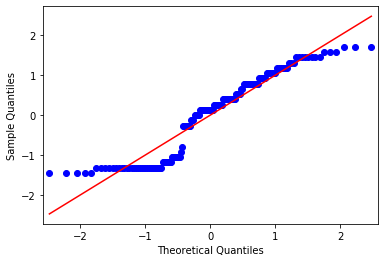

In [11]:
for i in range(4):
    sm.qqplot(X.iloc[:, i], line='s')
    
plt.show()

In [12]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [16]:
X = pd.DataFrame(X,columns=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)'])
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444
5,-0.537178,1.939791,-1.169714,-1.052180
6,-1.506521,0.788808,-1.340227,-1.183812
7,-1.021849,0.788808,-1.283389,-1.315444
8,-1.748856,-0.362176,-1.340227,-1.315444
9,-1.143017,0.098217,-1.283389,-1.447076


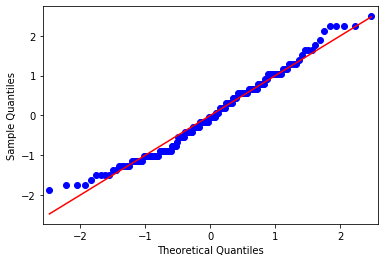

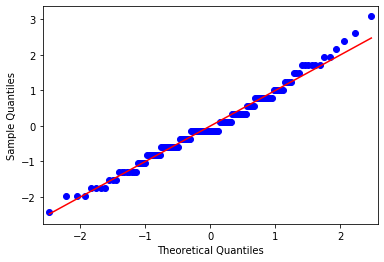

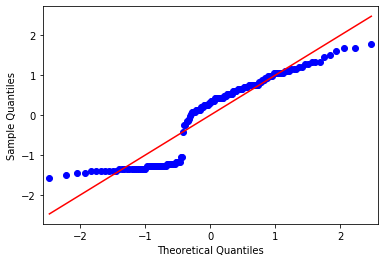

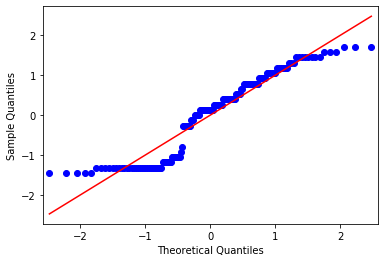

In [19]:
for i in range(4):
    sm.qqplot(X.iloc[:, i], line='s')
    
plt.show()

In [29]:
knn_class = KNeighborsClassifier()
knn_class.fit(X,y)

KNeighborsClassifier()

In [30]:
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

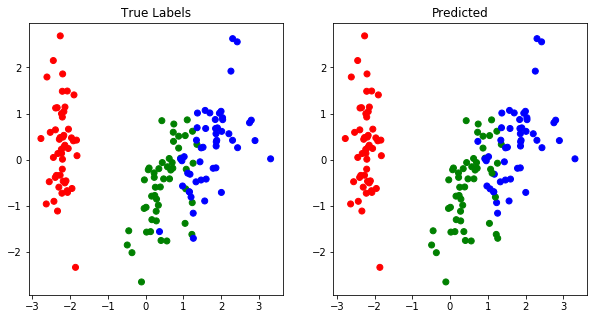

In [40]:
plt.figure(figsize=(10, 5))

y_predicted = knn_class.predict(X)
colors = ['red', 'green', 'blue']

plt.subplot(1, 2, 1)
plt.title('True Labels')
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap=matplotlib.colors.ListedColormap(colors))

plt.subplot(1, 2, 2)
plt.title('Predicted')
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_predicted, cmap=matplotlib.colors.ListedColormap(colors))
